<a href="https://colab.research.google.com/github/mrrkdas/Mini-Projects/blob/main/Linear_Regression_with_Diabetes_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes

## Data

In [26]:
data = load_diabetes()

In [27]:
data.keys()  # it is a sklearn bunch dataset

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [28]:
data.data.shape # 442 instances and 10 features

(442, 10)

In [29]:
data.target.shape

(442,)

In [30]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

## Preprocessing

In [31]:
# Defining X and y
X = data.data
y = data.target

In [32]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

In [33]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model

In [34]:
X_train.shape

(296, 10)

In [64]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Dense(10, activation = 'relu', input_shape = (10, )))
model.add(Dense(1))

model.compile(loss = 'MSE', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 10)                110       
                                                                 
 dense_33 (Dense)            (None, 1)                 11        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [65]:
r = model.fit(X_train_scaled, y_train, validation_data = (X_test_scaled, y_test), epochs = 100)

Epoch 1/100
10/10 [==============================] - 1s 40ms/step - loss: 29313.8066 - accuracy: 0.0000e+00 - val_loss: 29161.8184 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 10ms/step - loss: 29282.2305 - accuracy: 0.0000e+00 - val_loss: 29132.2227 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 17ms/step - loss: 29253.2832 - accuracy: 0.0000e+00 - val_loss: 29103.4238 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 10ms/step - loss: 29223.9395 - accuracy: 0.0000e+00 - val_loss: 29075.9453 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 10ms/step - loss: 29196.0098 - accuracy: 0.0000e+00 - val_loss: 29048.9219 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 14ms/step - loss: 29169.1348 - accuracy: 0.0000e+00 - val_loss: 29022.9277 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] -

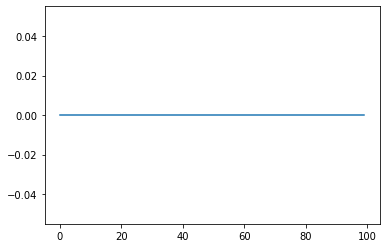

In [66]:
plt.plot(r.history['accuracy'])

## Model_1 using keras functional API

In [42]:
from tensorflow import keras

In [62]:
inputs = tf.keras.Input((10,))

dense = Dense(32, activation = 'relu')

x = dense(inputs)
x = Dense(10, activation = 'relu') (x)

output = Dense(1) (x)

model_1 = keras.Model(inputs = inputs, outputs = output, name = 'model_1')

model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_29 (Dense)            (None, 32)                352       
                                                                 
 dense_30 (Dense)            (None, 10)                330       
                                                                 
 dense_31 (Dense)            (None, 1)                 11        
                                                                 
Total params: 693
Trainable params: 693
Non-trainable params: 0
_________________________________________________________________


In [63]:
model_1.compile(loss = 'MSE', optimizer = 'adam', metrics = ['MSE'])

In [67]:
r = model_1.fit(X_train_scaled, y_train, validation_data = (X_test_scaled, y_test), epochs = 100)

Epoch 1/100
10/10 [==============================] - 1s 28ms/step - loss: 29131.6816 - MSE: 29131.6816 - val_loss: 28987.5645 - val_MSE: 28987.5645
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 29086.1895 - MSE: 29086.1895 - val_loss: 28946.5000 - val_MSE: 28946.5000
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 29048.3887 - MSE: 29048.3887 - val_loss: 28909.5098 - val_MSE: 28909.5098
Epoch 4/100
10/10 [==============================] - 0s 11ms/step - loss: 29011.1816 - MSE: 29011.1816 - val_loss: 28871.9590 - val_MSE: 28871.9590
Epoch 5/100
10/10 [==============================] - 0s 10ms/step - loss: 28971.8613 - MSE: 28971.8613 - val_loss: 28828.6855 - val_MSE: 28828.6855
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 28925.0195 - MSE: 28925.0195 - val_loss: 28778.9414 - val_MSE: 28778.9414
Epoch 7/100
10/10 [==============================] - 0s 15ms/step - loss: 28870.1523 - MSE: 28870.1523 - val_loss:

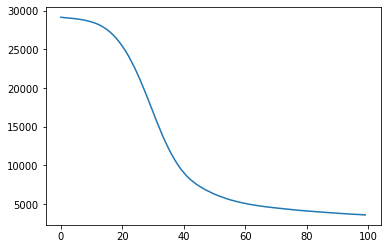

In [68]:
plt.plot(r.history['MSE'])

## Model_2 using keras functional API

In [60]:
inputs = keras.Input((10,))

dense_1 = Dense(128, activation = 'relu')

x = dense_1(inputs)
x = Dense(264, activation = 'relu') (x) # Making it big to just experiment
x = Dense(100, activation = 'relu') (x)
x = Dense(50, activation = 'relu') (x)
x = Dense(10, activation = 'relu') (x)

output = Dense(1) (x)

model_3 = keras.Model(inputs = inputs, outputs = output, name = 'model_3_bigboy')

model_3.summary()

Model: "model_3_bigboy"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_23 (Dense)            (None, 128)               1408      
                                                                 
 dense_24 (Dense)            (None, 264)               34056     
                                                                 
 dense_25 (Dense)            (None, 100)               26500     
                                                                 
 dense_26 (Dense)            (None, 50)                5050      
                                                                 
 dense_27 (Dense)            (None, 10)                510       
                                                                 
 dense_28 (Dense)            (None, 1)              

In [61]:
model_3.compile(loss = 'MAE', optimizer = 'adam', metrics = ['MSE', 'MAE'])

In [69]:
r = model_3.fit(X_train_scaled, y_train, validation_data = (X_test_scaled, y_test), epochs = 100)

Epoch 1/100
10/10 [==============================] - 2s 51ms/step - loss: 151.3705 - MSE: 28927.0430 - MAE: 151.3705 - val_loss: 150.1169 - val_MSE: 28284.4727 - val_MAE: 150.1169
Epoch 2/100
10/10 [==============================] - 0s 13ms/step - loss: 146.6259 - MSE: 27437.2383 - MAE: 146.6259 - val_loss: 138.9465 - val_MSE: 25021.6934 - val_MAE: 138.9465
Epoch 3/100
10/10 [==============================] - 0s 14ms/step - loss: 125.0828 - MSE: 21457.4316 - MAE: 125.0828 - val_loss: 96.1722 - val_MSE: 14448.5928 - val_MAE: 96.1722
Epoch 4/100
10/10 [==============================] - 0s 13ms/step - loss: 73.8764 - MSE: 9202.5078 - MAE: 73.8764 - val_loss: 65.7998 - val_MSE: 6470.4731 - val_MAE: 65.7998
Epoch 5/100
10/10 [==============================] - 0s 15ms/step - loss: 60.9505 - MSE: 5655.1865 - MAE: 60.9505 - val_loss: 51.8114 - val_MSE: 4337.3516 - val_MAE: 51.8114
Epoch 6/100
10/10 [==============================] - 0s 15ms/step - loss: 52.4129 - MSE: 4518.2520 - MAE: 52.4129 

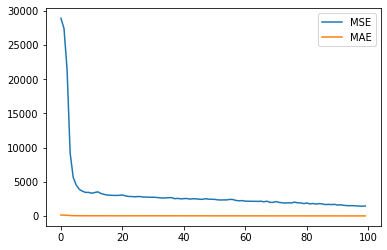

In [70]:
plt.plot(r.history['MSE'], label = 'MSE')
plt.plot(r.history['MAE'], label = 'MAE')

plt.legend()